## Before we Begin:
If you liked my work, please upvote this kernel since it will keep me motivated to perform more in-depth reserach towards further datasets and produce more accurate models

# 1.Introduction
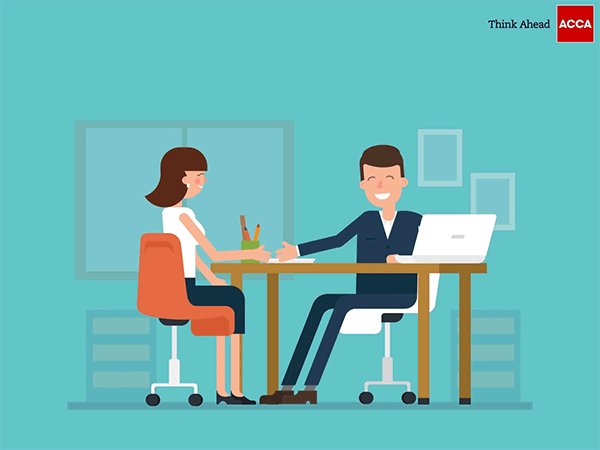
Campus recruitment is a strategy for **sourcing, engaging and hiring young talent for internship and entry-level positions**. College recruiting is typically a tactic for medium- to large-sized companies with high-volume recruiting needs, but can range from small efforts (like working with university career centers to source potential candidates) to large-scale operations (like visiting a wide array of colleges and attending recruiting events throughout the spring and fall semester). Campus recruitment often involves working with university career services centers and attending career fairs to meet in-person with college students and recent graduates.

**Context of our Dataset:** Our dataset revolves around the placement season of a Business School in India. Where it has various factors on candidates getting hired such as work experience,exam percentage etc., Finally it contains the status of recruitment and remuneration details.

# 2.Kernel Goals
There are three primary goals of this kernel.

* Do a **exploratory analysis** of the Recruitment dataset
* Do an **visualization analysis** of the Recruitment dataset
* **Prediction:** To predict whether a student got placed or not using **classification** models

# 3. Importing libraries and exploring Data
## 3a.Importing Libraries
Python is a fantastic language with a vibrant community that produces many amazing libraries. I am not a big fan of importing everything at once for the newcomers. So, I am going to introduce a few necessary libraries for now, and as we go on, we will keep unboxing new libraries when it seems appropriate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

## 3b.Extracting dataset

In [ ]:
#Loading the single csv file to a variable named 'placement'
placement=pd.read_csv("../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

## 3c. Examining the dataset

In [ ]:
placement_copy=placement.copy()
placement_copy.head()

**Inference**
* We have **Gender and Educational qualification** data
* We have all the **educational performance(score)** data
* We have the **status** of placement and salary details
* We can expect **null values in salary** as candidates who weren't placed would have no salary
* **Status** of placement is our target variable rest of them are independent variable except salary

In [ ]:
print ("The shape of the  data is (row, column):"+ str(placement.shape))
print (placement_copy.info())

We have **215 candidate details** and there are mixed datatypes in each column. We have few missing values in the salary column as expected since those are the people who didn't get hired

In [ ]:
#Looking at the datatypes of each factor
placement_copy.dtypes

We have **1 integer,5 float and 8 object** datatypes in our dataset

## 3d.Checking for missing data
Datasets in the real world are often messy, However, this dataset is almost clean and simple. Lets analyze and see what we have here.

In [ ]:
import missingno as msno 
msno.matrix(placement)

As per our inference, we can visualize the null values in salary. Let's see the count

In [ ]:
print('Data columns with null values:',placement_copy.isnull().sum(), sep = '\n')

**Inference**
* There are **67 null values** in our data, which means 67 unhired candidates. 
* We can't drop these values as this will provide a valuable information on why candidates failed to get hired.
* We can't impute it with mean/median values and it will go against the context of this dataset and it will show unhired candidates got salary.
* Our best way to deal with these null values is to **impute it with '0'** which shows they don't have any income

# 4. Data Cleaning

## 4a. Handling mis_ing values
First lets focus on the missing data in review features,if we drop the rows which has null values we might sabotage some potential information from the dataset. So we have to impute values into the NaN records which leads us to accurate models. Since it is a salary feature,it is best to impute the records with '0' for unhired candidates

In [ ]:
placement_copy['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',placement_copy['salary'].isnull().sum(), sep = '\n')

Yayy ! we have cleared that Salary **with zero null values**. Now it's time to drop unwanted features !

In [ ]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
placement_copy.head()

We have dropped **serial number** as we have index as default and we have **dropped the boards of school education** as I believe it doesn't matter for recruitment

## 4b. ....... Outliers
Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Unfortunately, all analysts will confront outliers and be forced to make decisions about what to do with them. Given the problems they can cause, you might think that it’s best to remove them from your data. But, that’s not always the case. Removing outliers is legitimate only for specific reasons.Outliers can be very informative about the subject-area and data collection process. It’s essential to understand how outliers occur and whether they might happen again as a normal part of the process or study area. Unfortunately, resisting the temptation to remove outliers inappropriately can be difficult. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. In our case, **let's first visualize our data and decide on what to do with the outliers**

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability percentage')

As you see, we have very less number of outliers in our features. Especially we have majority of the outliers in **hsc percentage** Let's clear em up!

In [ ]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p'] <= Q3 + 1.5 *IQR)
placement_filtered=placement_copy.loc[filter]

In [ ]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Before removing outliers(hsc_p)')
ax=plt.subplot(122)
plt.boxplot(placement_filtered['hsc_p'])
ax.set_title('After removing outliers(hsc_p)')

Voalá! We have removed the outliers

# 5.Data Visualizations
## 5a. Count of categorical features- Count plot

In [ ]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Specialisation
plt.subplot(234)
ax=sns.countplot(x="specialisation", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Work experience
plt.subplot(235)
ax=sns.countplot(x="workex", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("cividis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Degree type
plt.subplot(233)
ax=sns.countplot(x="degree_t", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("viridis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#Gender
plt.subplot(231)
ax=sns.countplot(x="gender", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Higher secondary specialisation
plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Status of recruitment
plt.subplot(236)
ax=sns.countplot(x="status", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("copper", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

**Inference**
* We have **more male candidates** than female
* We have candidates who did **commerce** as their hsc course and as well as undergrad
* **Science background** candidates are the second highest in both the cases
* Candidates from **Marketing and Finance** dual specialization are high 
* Most of our candidates from our dataset **don't have any work experience**
* Most of our candidates from our dataset **got placed** in a company

## 5b. Distribution Salary- Placed Students

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

placement_placed = placement_filtered[placement_filtered.salary != 0]
sns.boxplot(placement_placed["salary"], ax=ax_box)
sns.distplot(placement_placed["salary"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


**Inference**
* Many candidates who got placed received package between **2L-4L PA**
* Only **one** candidate got around **10L PA**
* The **average** of the salary is a little more than 2LPA


## 5c. Employability score vs Salary- Joint plot

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=placement_filtered["etest_p"], y=placement_filtered["salary"], kind='kde', color="skyblue")

**Inference**
* Most of the candidates scored around **60 percentage** got a decent package of **around 3 lakhs PA**
* **Not** many candidates received salary **more than 4 lakhs PA**
* The bottom dense part shows the candidates who were **not placed**

## 5d.Distribution of all percentages

In [ ]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(placement_filtered['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(placement_filtered['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(placement_filtered['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(placement_filtered['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(placement_filtered['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(placement_placed['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

**Inference**
* All the distributions follow **normal distribution** except salary feature
* Most of the candidates **educational performances are between 60-80%**
* **Salary distribution got outliers** where few have got salary of 7.5L and 10L PA

## 5e.Work experience Vs Placement Status

In [ ]:
#Code forked from-https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
placement_filtered['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = placement_filtered)
ax[1].set_title('Influence of experience on placement')
plt.show()

**Inference**
* We have nearly **66.2%** of candidates who never had any work experience
* Candidates who **never had work experience** have **got hired** more than the ones who had experience
* We can conclude that **work experience doesn't influence** a candidate in the recruitment process

## 5f. MBA marks vs Placement Status- Does your academic score influence?

In [ ]:
g = sns.boxplot(y = "status",x = 'mba_p',data = placement_filtered, whis=np.inf)
g = sns.swarmplot(y = "status",x = 'mba_p',data = placement_filtered, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

**Inference** <br>
Comparitively there's a slight difference between the percentage scores between both the groups, But still placed candidates still has an upper hand when it comes to numbers as you can see in the swarm. So as per the plot,percentage do influence the placement status

## 5g.Does MBA percentage and Employability score correlate?

In [ ]:
import plotly_express as px
gapminder=px.data.gapminder()
px.scatter(placement_filtered,x="mba_p",y="etest_p",color="status",facet_col="workex")

**Inference**
* There is **no relation** between mba percentage and employability test
* There are many candidates who **haven't got place**d when they don't have work experience
* Most of the candidates who performed better in both tests **have got placed**

## 5h. Is there any gender bias while offering remuneration?

In [ ]:
px.violin(placement_placed,y="salary",x="specialisation",color="gender",box=True,points="all")

**Inference**
* The **top salaries were given to male**
* The **average salary** offered were also **higher for male**
* **More male candidates were placed** compared to female candidates


## 5i. Coorelation between academic percentages

In [ ]:
sns.heatmap(placement_placed.corr(),annot=True,fmt='.1g',cmap='Greys')

**Inference**
* Candidates who were good in their academics performed well throughout school,undergrad,mba and even employability test
* These percentages **don't have any influence over their salary**

## 5j.Distribution of our data

In [ ]:
sns.pairplot(placement_filtered,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

**Inference**
* Candidates who has **high score in higher secondary and undergrad got placed**
* Whomever got **high scores in their schools got placed**
* Comparing the number of students who got placed candidates who got **good mba percentage and employability percentage**  

# 6. Preprocessing data for classficiation models
Now let's welcome our data to the model.Before jumping onto creating models we have to prepare our dataset for the models. We dont have to perform imputation as we dont have any missing values but we have categorical variables which needs to be encoded.

## 6a. Label Encoding
We have used label encoder function for the category which has only two types of classes

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    placement_filtered[col] = label_encoder.fit_transform(placement_filtered[col])
placement_filtered.head()

## 6b. One hot encoding
We have used dummies function for the category which has more than two types of classes

In [ ]:
dummy_hsc_s=pd.get_dummies(placement_filtered['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(placement_filtered['degree_t'], prefix='dummy')
placement_coded = pd.concat([placement_filtered,dummy_hsc_s,dummy_degree_t],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
placement_coded.head()

In [ ]:
feature_cols=['gender','ssc_p','hsc_p','hsc_p','workex','etest_p','specialisation','mba_p',
              'dummy_Arts','dummy_Commerce','dummy_Science','dummy_Comm&Mgmt','dummy_Others','dummy_Sci&Tech']
len(feature_cols)

## 6c. Assigning the target(y) and predictor variable(X)
Our Target is to find whether the candidate is placed or not. We use rest of the features except 'salary' as this won't contribute in prediction(i.e) In real world scenario, students gets salary after they get placed, so we can't use a future feature to predict something which happens in the present

In [ ]:
X=placement_coded.drop(['status'],axis=1)
y=placement_coded.status

## 6d. Train and Test Split (80:20)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

# 7. Machine Learning models 
Now let's feed the models with our data
**Objective**: To predict whether a student got placed or not

## 7a.Logistic Regression
Let's fit the model in logistic regression and figure out the accuracy of our model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

**83% accurate**. That's really good. Let's check out confusion matrix and see the classification report

### Confusion matrix and Classification report

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

**Insights:**
*  The Confusion matrix result is telling us that we have **9+26** correct predictions and **1+6** incorrect predictions.
*  The Classification report reveals that we have **84%** precision which means the accuracy that the model classifier not to label an instance positive that is actually negative and it is important to consider precision value because when you are hiring, you want to **avoid Type I errors at all cost**. They are **culture killers**.In hiring, a false positive is when you THINK an employee is a good fit, but in actuality they’re not.

### ROC Curve
Let's check out the performance of our model through ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

From the ROC curve we can infer that our logistic model has classified the placed students correctly rather than predicting false positive. T**he more  the ROC curve(blue) lies towards the top left side the better our model** is. We can choose **0.8 or 0.9** for the threshold value which can reap us true positive results

## 7b. Decision Tree
Let's checkout how the model makes the decision using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Woah **73% accurate** with using gini index as criterion. I have tried entropy which has high accuracy but considers less features for splitting,so I shifted to gini which considered more features for splitting

In [ ]:
pip install pydotplus

In [ ]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'], precision=1)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Inference**
* We have **4** sets of placed and not placed students 
* It has been splitted based on ssc_p followed by hsc_p,mba_p and etest_p
* We have minimised the depth to **3** to prevent it from overfitting
* We still have **few gini value**(impurity) in classes of leaf node.
* Pure classes show that they have been splitted under th criteria of **ssc_p<=63.7 and e_testp<=825.**

So the best splitting can be made possible through **etest_p** feature

## 7c. Random Forest
Since one tree can't produce accurate results lets use random forest to create a aggregation of trees and produce accurate results

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rt=RandomForestClassifier(n_estimators=100)
rt.fit(X_train,y_train)
y_pred=rt.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

We have an accuracy of **83%**. Not bad. But let's try check out important features and try to boost the precision

### Looking at Feature Importance
Let's see which feature influences more on making the decision and we should cut it off to make our model accurate

In [ ]:
feature_imp = pd.Series(rt.feature_importances_,index=feature_cols).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

As we see the **school and undergrad specialisations** have less influence in classifying the model. But it is really wierd to acknowledge **ssc_p** influencing more in classifying

### Pruning out less important feature
Let's cut off the less important feature and check for model accuracy.

In [ ]:
X=placement_coded.drop(['status','dummy_Comm&Mgmt','dummy_Sci&Tech','dummy_Science','dummy_Commerce',
                        'dummy_Arts','dummy_Others'],axis=1)
y=placement_coded.status
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
rt2=RandomForestClassifier(n_estimators=100)
rt2.fit(X_train,y_train)
y_pred=rt2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
roc_value = roc_auc_score(y_test, y_pred)
roc_value
print("ROC Value:",roc_value)

Great. Now We have an **accuracy of 81%** and the **ROC value 73%** indicates the models have classified better without having much false positive predictions

## 7d. K Nearest Neighbours
Let's try out a lazy supervised classification algorithm. Our beloved, KNN

### Choosing a K value 
Let's decide on the K value

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

### Error rate vs K-value

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

There are a lot of ups and downs in our graph. If we consider any value between 10-15 we may get an overfitted model. So let's stick onto the first trough. Our **K value is 5**

In [ ]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

**Insights:**
* Our model has precisely classified **86%** of Not placed categories and **74%** of Placed categories
* To talk in numbers **26+6** correct classifications and **1+9** false negative and false positive classification.
* We should be considering the **precision value as our metric** because the possibility of commiting False Positive is very crucial in recuritment 

## 7e. Naive Bayes Classifier with Cross Validation
Let's use Naive Bayes model for our dataset. Since our outcome feature has 1,0(placed, not placed) we can go with Bernoulli Naive bayes algorithm and also let's measure the accuracy with cross validation

In [ ]:
#Importing and fitting
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import cross_val_score
gnb = BernoulliNB() 
gnb.fit(X_train, y_train) 
  
#Applying and predicting 
y_pred = gnb.predict(X_test) 
cv_scores = cross_val_score(gnb, X, y, 
                            cv=10,
                            scoring='precision')
print("Cross-validation precision: %f" % cv_scores.mean())

Our cross validation precision is approximately **73.5%** 

## 7f. Support Vector Machine
Let's use SVM to classify our output feature

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,y_pred))

**Inference**
* We have got **82% and 81%** precision in classifying our model.
* **9+25** correctly classified and **2+6** wrongly classified( False Negative & False Positive)

## 7g. XGBoost
Let's try our the state of art ensemble model XGBoost. We have used RMSE metrics for model performance

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

Great. The error value of our model is just **0.577**. Now let's use cross validation and try to minimise further

### XGBoost with Cross Validation
In this algorithm we are using DMatrix to convert our dataset into a matrix and produce the output in dataframe. Algorithm inspired from [DataCamp](https://www.datacamp.com/community/tutorials/xgboost-in-python#apply)

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
params = {"objective":"reg:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

Nice. We have reduced our model error to **0.41** 

# Report Summary
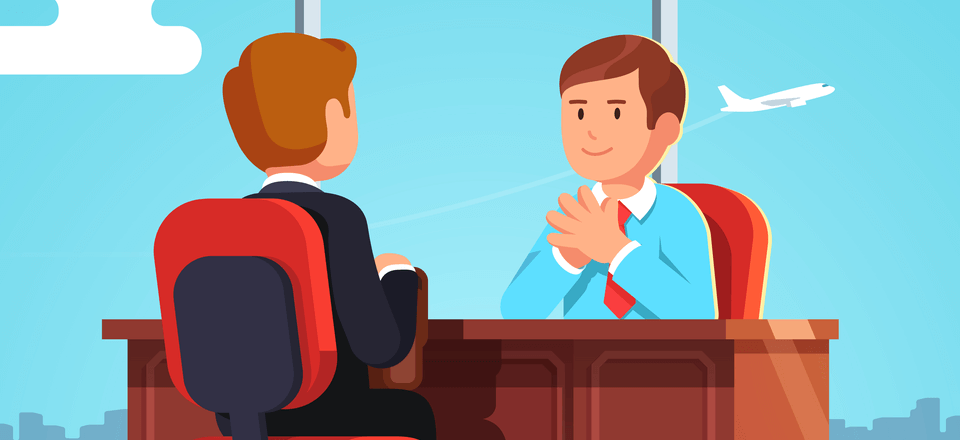
From the analysis report on Campus Recruitment dataset here are my following conclusions

* **Educational percentages** are highly influential for a candidate to get placed
* **Past work experience** doesn't influence much on your masters final placements
* There are **no gender discrimination** while hiring, but higher packages were given to male
* Academic percentages have **no relation** towards salary package.


## Hit upvote if you like my work and also check out my [other notebooks](https://www.kaggle.com/benroshan/notebooks)